<a href="https://www.kaggle.com/code/tusharaggarwal27/banknote-are-those-real?scriptVersionId=116760843" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#F5DEB3;
           font-size:170%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          text-align: center;
          font-size:150%;
          color:blue;">
           💵💸Banknote-Are those real?💵💸
            
</p>
<style>
        h1{text-align: center;}
</style>  
    
</div>


<p style="font-family:cursive; font-size:15px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing ,Thank you!</p>

<p style="width: 700px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 700px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>
<p style="width: 700px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
   </p>

<div class="alert alert-info" role="alert" style="font-size:20px;border-radius:20px">
    <b>In this project, I am building a machine learning model to predict if banknote is real or fake.</b>
      </div>
<div class="alert alert-info" role="alert" style="font-size:17px;border-radius:20px">
Have you ever been in a supermarket where you handed cash to cashiers only to discover that the money was fake while there was a long line of people waiting to pay?Or, even more embarrassing, why did you not carry any additional banknotes?
    </div>


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
   <b>Steps used for the model</b>
</p>
<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">
<br>Step 1: Gather and EDA of the data
<br><br>Step 2: K-Means model fitting
<br><br>Step 3: Re-run K-means several times to to see if we get similar results, which can tell if the K-Means model is stable or not
<br><br>Step 4: Analyze the K-Means computing results
<br><br>Step 5: Calculate the accuracy of the result!

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Importing the required Libraries
    
   </p>

In [13]:
# Data manipulation imports
import numpy as np
import pandas as pd
from scipy.io import arff

# Visualization imports
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [14]:
# Reading the data as a DataFrame

data = arff.loadarff('/kaggle/input/banknoteauthentication/php50jXam.arff')

bank_note = pd.DataFrame(data[0])
bank_note.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,b'1'
1,4.54590,8.1674,-2.4586,-1.46210,b'1'
2,3.86600,-2.6383,1.9242,0.10645,b'1'
3,3.45660,9.5228,-4.0112,-3.59440,b'1'
4,0.32924,-4.4552,4.5718,-0.98880,b'1'


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">
This dataset is about distinguishing genuine and forged banknotes. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. A Wavelet Transform tool was used to extract features from these images. (Source: https://www.openml.org/d/1462)
    </p>

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px"> EDA
    </p>

In [15]:
#getting the metadata
bank_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
 2   V3      1372 non-null   float64
 3   V4      1372 non-null   float64
 4   Class   1372 non-null   object 
dtypes: float64(4), object(1)
memory usage: 53.7+ KB


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">
    <b>Attributes Information</b>
    <br>1. V1. variance of Wavelet Transformed image (continuous)
<br>2. V2. skewness of Wavelet Transformed image (continuous)
<br>3. V3. curtosis of Wavelet Transformed image (continuous)
<br>4. V4. entropy of image (continuous)


In [16]:
bank_note['Class'].unique()
#according to data set it has 2 classes,lets see further with wcss how many k we can make

array([b'1', b'2'], dtype=object)

In [17]:
#exploring the basic statistical info
bank_note.describe(include='all')

,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,b'1'
freq,NaN,NaN,NaN,NaN,762
mean,0.433735,1.922353,1.397627,-1.191657,NaN
std,2.842763,5.869047,4.310030,2.101013,NaN
min,-7.042100,-13.773100,-5.286100,-8.548200,NaN
25%,-1.773000,-1.708200,-1.574975,-2.413450,NaN
50%,0.496180,2.319650,0.616630,-0.586650,NaN
75%,2.821475,6.814625,3.179250,0.394810,NaN


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px"><b>**K-Means itself, I only picked out two variables to build the models, which are V1 (variance of Wavelet Transformed image) and V2 (skewness of Wavelet Transformed image).**<b/>

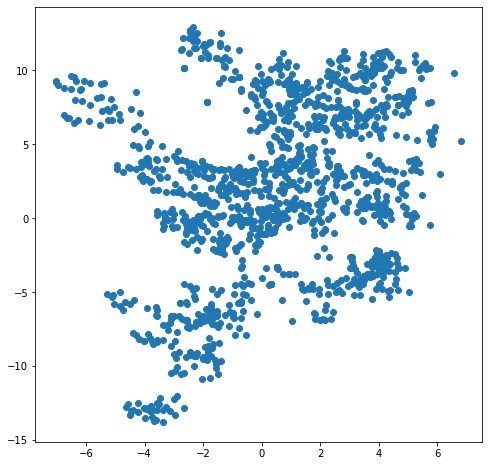

In [18]:
#displaying scatter 
plt.figure(figsize = [8, 8])
plt.scatter(bank_note.V1, bank_note.V2)

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">The first step in building K-Means is to assess if this dataset is suitable for K-Means; if not, then we should choose other clustering models. After seeing this plot, I found the data distribution in the graph is neither too wide, nor too centered at one place, therefore it is worth trying to computing K-Means on this dataset. But, there is no obvious cluster in spherical shapes so we should expect the K-Means model won’t work perfectly here.</p>

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px"> Step 2: K-Means model fitting</p>

In [19]:
from sklearn.datasets import make_blobs,make_circles,make_moons


bank_note_1 = np.column_stack(( bank_note.V1, bank_note.V2))  # we use only V1 and V2

#compute KMeans

km_pic = KMeans(n_clusters=2).fit(bank_note_1)
clusters = km_pic.cluster_centers_
#clusters #the the coordinates of clusters

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


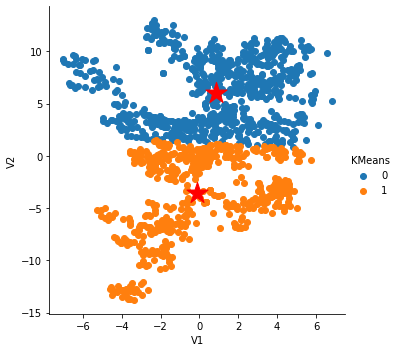

In [20]:
# put the assigned labels to the original dataset
bank_note['KMeans'] = km_pic.labels_

#plot out the result
g = sns.FacetGrid(data = bank_note, hue = 'KMeans', size = 5)
g.map(plt.scatter, 'V1', 'V2')
g.add_legend();
plt.scatter(clusters[:,0], clusters[:,1], s=500, marker='*', c='r')

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px"> Step 3: Re-run K-means several times to to see if we get similar results, which can make sure the K-Means model is stable in the dataset.</p>

TypeError: '(array([ True,  True, False, ..., False, False, False]), 0)' is an invalid key

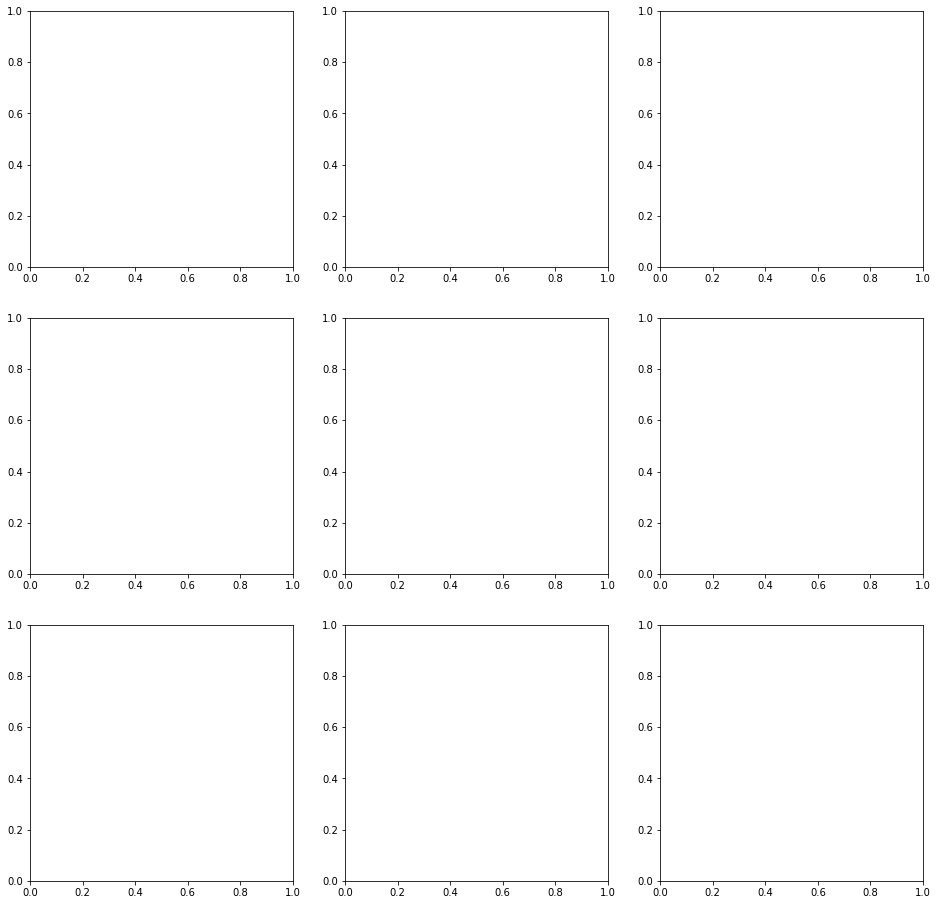

In [21]:
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = KMeans(n_clusters=2,
                max_iter=3)
    km.fit(bank_note)
    centroids = km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(bank_note[km.labels_ == 0, 0].value, bank_note[km.labels_ == 0, 1],
                   label='cluster 1')
    ax[i].scatter(bank_note[km.labels_ == 1, 0], bank_note[km.labels_ == 1, 1],
                   label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].legend(loc='lower right')
    ax[i].set_aspect('equal')
plt.tight_layout();

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">After running K-Means for 9 times, the results we got are very similar, which means the K-Means here is stable.</p>

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">Step 4: Analyze the K-Means computing results</p>

In [22]:
bank_note.groupby('KMeans').describe()

V1                                                                  \
        count      mean       std     min       25%      50%      75%     max   
KMeans                                                                          
0       783.0  0.866467  2.908259 -7.0421 -0.962905  1.10500  3.20415  6.8248   
1       589.0 -0.141526  2.648255 -5.2943 -2.208300 -0.66008  2.00510  5.7403   

           V2            ...        V3              V4                      \
        count      mean  ...       75%      max  count      mean       std   
KMeans                   ...                                                 
0       783.0  6.046704  ...  0.605495   7.7618  783.0 -2.108172  2.238951   
1       589.0 -3.560442  ...  7.541600  17.9274  589.0  0.026733  1.009967   

                                                    
           min      25%      50%       75%     max  
KMeans                                              
0      -8.5482 -3.83425 -1.67800 -0.364885  2.1547  
1      -3.3202 -0.53751  0.10645  0.751700  2.4495  

[2 rows x 32 columns]

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">There are ~574 data being clustered in group 0, and ~798 data being clustering in group 1. For group 1, V1’s mean = ~-0.20 and V1’s mean = ~-3.67. while for group 2, V1’s mean = ~0.88 and V2’s mean = ~5.95.

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">Step 5: Calculate the accuracy of the result.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


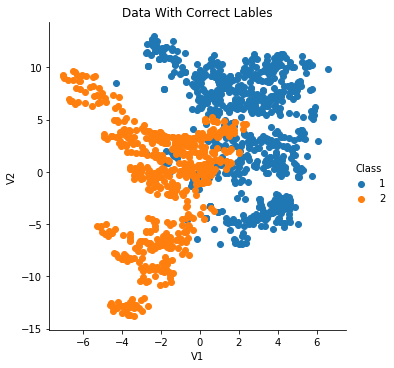

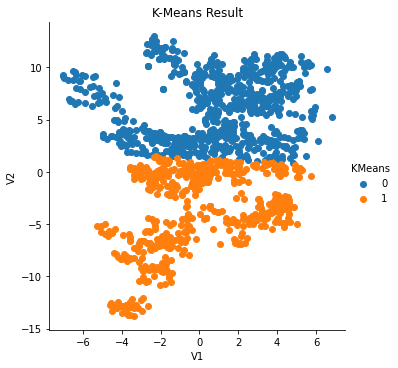

In [23]:
# plot the data with Correct labels
g = sns.FacetGrid(data = bank_note, hue = 'Class', size = 5)
g.map(plt.scatter, 'V1', 'V2')
g.add_legend()
plt.title("Data With Correct Lables")


# plot the data computed by K-Means
g = sns.FacetGrid(data = bank_note, hue = 'KMeans', size = 5)
g.map(plt.scatter, 'V1', 'V2')
g.add_legend()
plt.title("K-Means Result");

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">We can see the K-Means one tends to be divided by a horizontal line at V2 = 1, whereas the original one tends to be divided by a slightly slant vertical line at V1 =0. Which showed one drawback of K-Means which is that K-Means gives more weight to the bigger clusters.(The group 1 in K-Means tends to include the bigger cluster in the below position.) Let’s calculate the accuracy of this K-Means clustering model:



In [24]:
# correct the labels
bank_note["KMeans"] = bank_note["KMeans"].map({0: 1, 1: 2})

# calculate the accuracy of the model.
correct = 0

for i in range(0,1372):
    if bank_note.Class[i] == bank_note["KMeans"][i]:
        correct+=1
print(correct/1371)

0.0


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">K-Means Result: The accuracy of this K-Means Model is 65.3%.
<br><br>Nice! Since I didn’t conduct any data cleaning process and pre-analysis here, so getting an accuracy of 65.3% is quite reasonable. However, if you are interested in optimizing the accuracy rate, you can consider conducting factor analysis to find the most influential variables to put into the models. Then you will get a better result!
<br><br>
    <b>Coming up model comparison and Hyperparameter tunning</b>
    </p>